In [1]:
import yfinance as yf
import numpy as np

In [32]:
tickers=['^GSPC','GC=F','TSLA']

In [33]:
df=yf.download(tickers,start='2010-01-01')['Adj Close']
df

[*********************100%%**********************]  3 of 3 completed


,GC=F,TSLA,^GSPC
Date,,,
2010-01-04,1117.699951,NaN,1132.989990
2010-01-05,1118.099976,NaN,1136.520020
2010-01-06,1135.900024,NaN,1137.140015
2010-01-07,1133.099976,NaN,1141.689941
2010-01-08,1138.199951,NaN,1144.979980
...,...,...,...
2024-06-14,2331.399902,178.009995,5431.600098
2024-06-17,2312.399902,187.440002,5473.229980
2024-06-18,2330.399902,184.860001,5487.029785


In [34]:
ret_df=np.log(df/df.shift(1))
ret_df

,GC=F,TSLA,^GSPC
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.000358,NaN,0.003111
2010-01-06,0.015795,NaN,0.000545
2010-01-07,-0.002468,NaN,0.003993
2010-01-08,0.004491,NaN,0.002878
...,...,...,...
2024-06-14,0.013473,-0.024746,-0.000394
2024-06-17,-0.008183,0.051619,0.007635
2024-06-18,0.007754,-0.013860,0.002518


In [35]:
ret_df.corr()

,GC=F,TSLA,^GSPC
GC=F,1.000000,0.048173,0.04399
TSLA,0.048173,1.000000,0.43162
^GSPC,0.043990,0.431620,1.00000


<Axes: xlabel='Date'>

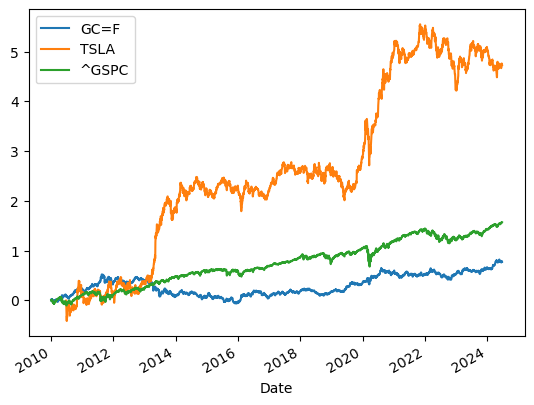

In [36]:
ret_df.cumsum().plot()

In [37]:
ret_df.mean()

GC=F     0.000214
TSLA     0.001345
^GSPC    0.000432
dtype: float64

In [38]:
ret_df.std()

GC=F     0.010063
TSLA     0.035655
^GSPC    0.010957
dtype: float64

In [39]:
W=np.ones(len(ret_df.columns))/(np.ones(len(ret_df.columns))).sum()
W #weights vector

array([0.33333333, 0.33333333, 0.33333333])

In [40]:
(W*ret_df.mean()).sum()

0.0006640028358454438

In [41]:
ret_df.mean().dot(W)

0.0006640028358454438

In [42]:
ret_df.mean()

GC=F     0.000214
TSLA     0.001345
^GSPC    0.000432
dtype: float64

In [43]:
ret_df.std()

GC=F     0.010063
TSLA     0.035655
^GSPC    0.010957
dtype: float64

### Given Data

#### Covariance Matrix (\( \boldsymbol{\Sigma} \))

\[ 
\boldsymbol{\Sigma} = \begin{bmatrix}
\sigma_{AA} & \sigma_{AB} & \sigma_{AC} \\
\sigma_{BA} & \sigma_{BB} & \sigma_{BC} \\
\sigma_{CA} & \sigma_{CB} & \sigma_{CC}
\end{bmatrix} 
\]

#### Portfolio Weights Vector (\( \mathbf{w} \))

\[ 
\mathbf{w} = \begin{bmatrix}
w_A \\
w_B \\
w_C
\end{bmatrix} 
\]

### Calculating the Portfolio Variance

#### Step 1: Intermediate Product (\( \boldsymbol{\Sigma} \mathbf{w} \))

\[ 
\boldsymbol{\Sigma} \mathbf{w} = \begin{bmatrix}
\sigma_{AA} & \sigma_{AB} & \sigma_{AC} \\
\sigma_{BA} & \sigma_{BB} & \sigma_{BC} \\
\sigma_{CA} & \sigma_{CB} & \sigma_{CC}
\end{bmatrix} \begin{bmatrix}
w_A \\
w_B \\
w_C
\end{bmatrix} 
\]

This is computed as:

\[ 
\boldsymbol{\Sigma} \mathbf{w} = \begin{bmatrix}
(\sigma_{AA} \cdot w_A) + (\sigma_{AB} \cdot w_B) + (\sigma_{AC} \cdot w_C) \\
(\sigma_{BA} \cdot w_A) + (\sigma_{BB} \cdot w_B) + (\sigma_{BC} \cdot w_C) \\
(\sigma_{CA} \cdot w_A) + (\sigma_{CB} \cdot w_B) + (\sigma_{CC} \cdot w_C)
\end{bmatrix} 
\]

#### Step 2: Final Product (\( \mathbf{w}^T (\boldsymbol{\Sigma} \mathbf{w}) \))

\[ 
\sigma_p^2 = \mathbf{w}^T (\boldsymbol{\Sigma} \mathbf{w}) = \begin{bmatrix}
w_A & w_B & w_C
\end{bmatrix} \begin{bmatrix}
(\sigma_{AA} \cdot w_A) + (\sigma_{AB} \cdot w_B) + (\sigma_{AC} \cdot w_C) \\
(\sigma_{BA} \cdot w_A) + (\sigma_{BB} \cdot w_B) + (\sigma_{BC} \cdot w_C) \\
(\sigma_{CA} \cdot w_A) + (\sigma_{CB} \cdot w_B) + (\sigma_{CC} \cdot w_C)
\end{bmatrix} 
\]

This is computed as:

\[ 
\sigma_p^2 = (w_A \cdot (\sigma_{AA} \cdot w_A + \sigma_{AB} \cdot w_B + \sigma_{AC} \cdot w_C)) + (w_B \cdot (\sigma_{BA} \cdot w_A + \sigma_{BB} \cdot w_B + \sigma_{BC} \cdot w_C)) + (w_C \cdot (\sigma_{CA} \cdot w_A + \sigma_{CB} \cdot w_B + \sigma_{CC} \cdot w_C)) 
\]

Simplifying further:

\[ 
\sigma_p^2 = w_A^2 \cdot \sigma_{AA} + w_A w_B \cdot (\sigma_{AB} + \sigma_{BA}) + w_A w_C \cdot (\sigma_{AC} + \sigma_{CA}) + w_B^2 \cdot \sigma_{BB} + w_B w_C \cdot (\sigma_{BC} + \sigma_{CB}) + w_C^2 \cdot \sigma_{CC}
\]

### Result

The variance of the portfolio (\( \sigma_p^2 \)) in terms of variables is:

\[ 
\sigma_p^2 = w_A^2 \cdot \sigma_{AA} + w_A w_B \cdot (\sigma_{AB} + \sigma_{BA}) + w_A w_C \cdot (\sigma_{AC} + \sigma_{CA}) + w_B^2 \cdot \sigma_{BB} + w_B w_C \cdot (\sigma_{BC} + \sigma_{CB}) + w_C^2 \cdot \sigma_{CC}
\]

This expression captures the portfolio variance using the covariance matrix and portfolio weights in variable form.


In [44]:
ret_df.cov()

,GC=F,TSLA,^GSPC
GC=F,0.000101,0.000017,0.000005
TSLA,0.000017,0.001271,0.000167
^GSPC,0.000005,0.000167,0.000120


In [45]:
W[0]**2* 0.000101 +W[1]**2*0.000127 + 2*W[0]*W[1]*0.00005

3.644444444444444e-05

In [46]:
8.2e-05**(1/2)

0.009055385138137417

In [47]:
W.T.dot(ret_df.cov().dot(W))

0.00020797867593959623

In [48]:
(W.T.dot(ret_df.cov().dot(W)))**0.5

0.014421465804126716

In [49]:
ret_df.mean().dot(W)

0.0006640028358454438

In [50]:
ret_df.mean()

GC=F     0.000214
TSLA     0.001345
^GSPC    0.000432
dtype: float64

In [51]:
ret_df.std()

GC=F     0.010063
TSLA     0.035655
^GSPC    0.010957
dtype: float64

In [52]:
ret_df.mean()/ret_df.std()

GC=F     0.021295
TSLA     0.037735
^GSPC    0.039451
dtype: float64

In [53]:
ret_df.mean().dot(W)/(W.T.dot(ret_df.cov().dot(W)))**(0.5) #this gives the sharpe ratio


0.046042673114090715

In [ ]:
#https://www.youtube.com/watch?v=t4jrCnrpgdw